# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 8
### Page Rank
#### Mateusz Surjak

In [224]:
import numpy as np
import networkx as nx
#instalacja ---> pip install networkx
import matplotlib.pyplot as plt

## Zadanie 1 Prosty ranking wierzchołków
### Zaimplementuj prosty model błądzenia przypadkowego po grafie skierowanym

Zaimplementowałem funkcję generującą losową macierz adjacencji grafu skierowanego

In [225]:
def random_adjacency_matrix(n=100):
    return np.random.randint(2, size=(n,n), dtype=np.int)

Poniżej prezentuję funkcję odpowiedzialną za rysowanie grafu na podstawie wygenerowanego grafu.

In [226]:
def draw_graph_from_adjacency_matrix(matrix):
    G = nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph())
    pos = nx.fruchterman_reingold_layout(G)
    plt.figure(figsize=(8, 8), facecolor='white')
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='#A0CBE2')
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    plt.axis('off')
    plt.show()

Zdefiniowałem pomocniczą funkcje zwracajacą wierzchołki wchodzące do wierzchołka v.

In [227]:
def vertices_in(matrix, u):
    vertices = []
    for v in range(0, len(matrix)):
        if matrix[v][u] == 1:
            vertices.append(v)
    return vertices

Następnie zdefiniowałem funkcje zwracającą przeskalowaną macierz adjacencji.

In [228]:
def scaled_adjacency_matrix(matrix):
    N = np.zeros(len(matrix), dtype=np.int)
    
    for i in range(0, len(matrix)):
        vertices = []
        for u in range(0, len(matrix)):
            if matrix[i][u] == 1:
                vertices.append(u)
            N[i] = len(vertices)

    A = np.zeros((len(matrix), len(matrix)))
    for u in range(0, len(matrix)):
        for v in range(0, len(matrix[u])):
            if matrix[u][v] == 1:
                A[u][v] = 1/N[u]
                
    return A

Zaimplementowałem prosty model błądzenia przypadkowego po grafie skierowanym

In [229]:
def rank(matrix, d, r):
    new_rank = np.zeros(len(matrix))
    
    for u in range(0, len(matrix)):
        rank_value = 0
        rank_sum = 0
        for v in vertices_in(matrix, u):
            if len(vertices_in(matrix, v)) != 0:
                rank_sum += r[v]/len(vertices_in(matrix, v))
        rank_value = d * rank_sum
        new_rank[u] = rank_value
        
    return new_rank

def page_rank(matrix, d, iterations=10):
    A = scaled_adjacency_matrix(matrix)
    start_r = [1]*len(matrix)
    page_r = rank(matrix, d, start_r)
    for i in range(0,iterations):
        page_r = rank(matrix, d, page_r)
    return page_r

In [230]:
def plot_page_rank(page_rank, figwidth=8):
    y_pos = np.arange(len(page_rank))
    plt.figure(figsize=(figwidth, 4), facecolor='white')
    plt.bar(y_pos, page_rank, align='center', color='#A0CBE2', alpha=0.5)
    plt.xticks(y_pos, y_pos)
    plt.xlabel('Page ID')
    plt.ylabel('Rank value')
    plt.title('Page rank')
    plt.show()

[[0 0 1 1 1 1 1 1 0 0]
 [0 0 1 1 0 1 0 0 0 1]
 [0 1 0 1 1 1 0 1 1 0]
 [1 1 0 0 1 0 1 0 1 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 1 1 1]
 [0 0 0 1 1 0 1 0 1 1]
 [0 1 1 1 1 1 1 0 1 0]
 [0 0 0 1 1 0 1 0 0 1]
 [1 0 1 0 1 1 0 0 1 0]]


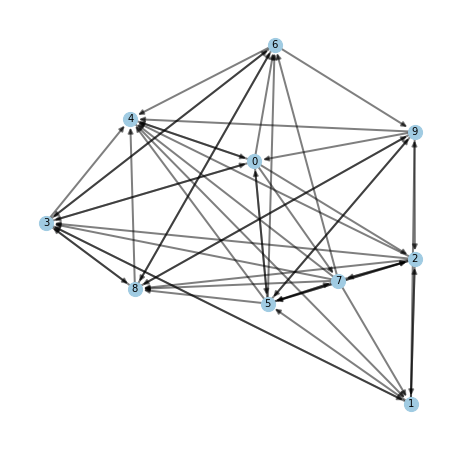

[6.58846336e-08 6.58846336e-08 8.23557920e-08 9.88269505e-08
 1.31769267e-07 8.23557920e-08 9.88269505e-08 4.94134752e-08
 9.88269505e-08 6.58846336e-08]


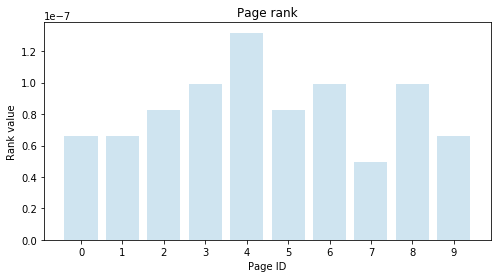

In [231]:
matrix = random_adjacency_matrix(10)
print(matrix)
draw_graph_from_adjacency_matrix(matrix)
r = page_rank(matrix, d=0.85, iterations=100)
print(r)
plot_page_rank(r)

Jak można zauważyć wierzchołek do którego dochodzi najwięcej krawędzi ma największy ranking.

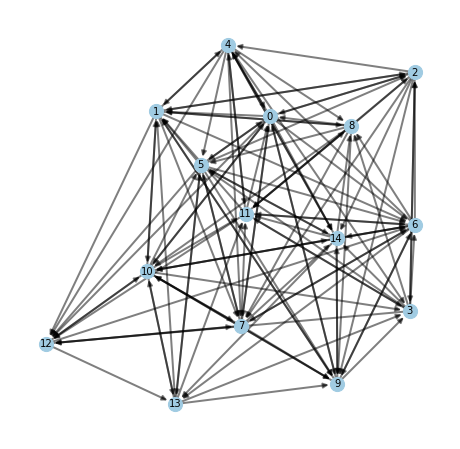

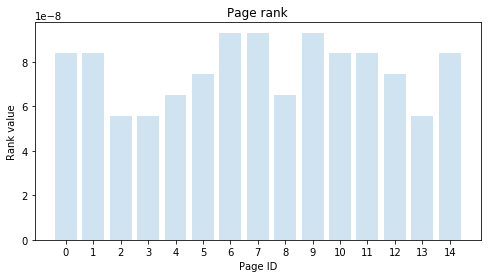

In [232]:
matrix = random_adjacency_matrix(15)
draw_graph_from_adjacency_matrix(matrix)
plot_page_rank(page_rank(matrix, d=0.85, iterations=100))

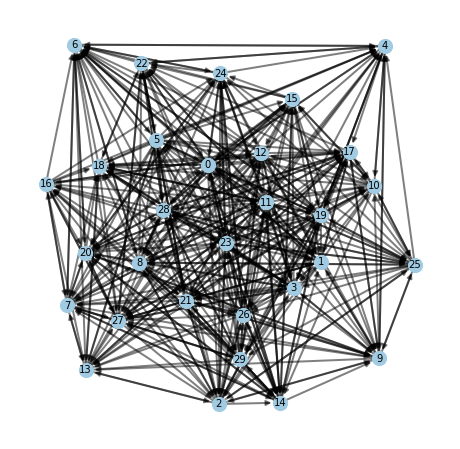

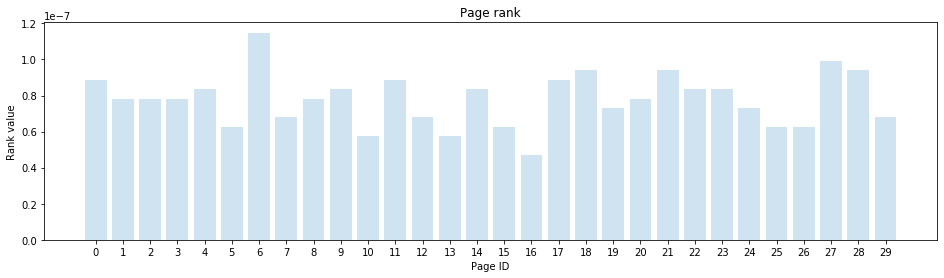

In [233]:
matrix = random_adjacency_matrix(30)
draw_graph_from_adjacency_matrix(matrix)
plot_page_rank(page_rank(matrix, d=0.85, iterations=100), figwidth=16)

Jakie problemy można napotkać próbując wykorzystać takie metody dla
bardzo dużych grafów ($10^9$ wierzchołków)?
- pierszym problemem jest napewno wydajność gdyż w celu przejscia porzez całą tablicę należy wykonać $10^{18}$ operacji, a do tego dochodzi czas załadowania grafu i innych opreracji na nim
- następnym problemem może być problem z pamięciom, przechowywanie takiej liczby wierzchołków i operowanie na nich jest wyzwaniem dla programu.
- następnym problemem może być niedomiar, gdy mamy bardzo popularne wierzchołki oraz bardzo mało popularne, to te drugie mogą wręcz zniknąć przy ogromie tych popularnych.
- wiele operacji na tak wielkich grafach wykonuje się bezpośrednio po stronie bazy danych, np. baza grafowa Neo4j umożliwia szereg pożytecznych funkcji pomagających w przetwarzaniu danych oraz wykonuje te operacje w szybkim czasie.

## Wnioski:
- Prosty ranking wierzchołków pozwala na znajdowanie najbardziej popularnych wierzchołków w grafie, oraz jego ważnych punktów w których jest duży "przepływ".

## Zadanie 2 Page Rank
### Rozszerz model z poprzedniego zadania, dodając możliwość skoku do losowego wierzchołka grafu

Rozszerzyłem funkcje rank zgodnie z wzorem z polecenia

In [234]:
def rank2(matrix, d, e, r):
    new_rank = np.zeros(len(matrix))
    
    for u in range(0, len(matrix)):
        rank_value = 0
        rank_sum = 0
        for v in vertices_in(matrix, u):
            if len(vertices_in(matrix, v)) != 0:
                rank_sum += r[v]/len(vertices_in(matrix, v))
        rank_value = d * rank_sum + (1 - d)*e[u]
        
        new_rank[u] = rank_value
        
    return new_rank

def page_rank2(matrix, d, e, iterations=10):
    A = scaled_adjacency_matrix(matrix)
    start_r = [1]*len(matrix)
    page_r = rank2(matrix, d, e, start_r)
    for i in range(0,iterations):
        page_r = rank2(matrix, d, e, page_r)
    return page_r

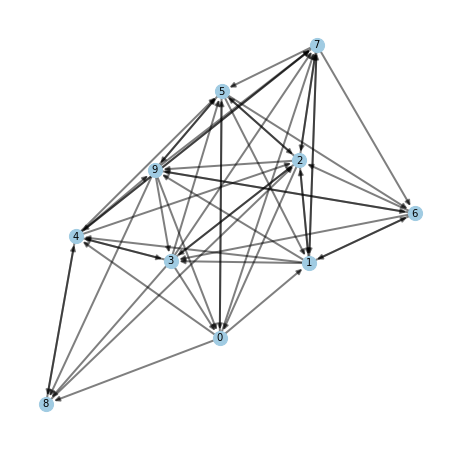

In [235]:
matrix = random_adjacency_matrix(10)
draw_graph_from_adjacency_matrix(matrix)

Test dla wartości d=0.85 oraz e=1/3*[1,1,..], 

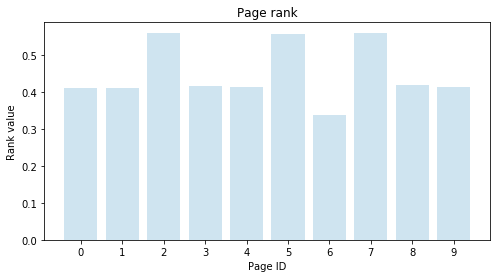

In [236]:
pr = page_rank2(matrix, d=0.85, e=[1/3]*len(matrix))
plot_page_rank(pr)

Test dla wartości d=0.85 oraz e=1/10*[1,1,..]

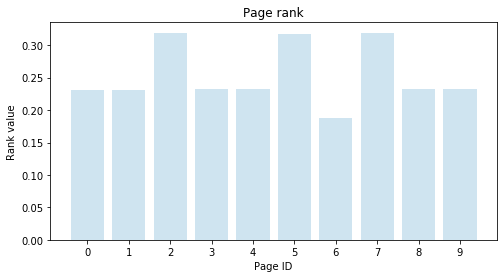

In [237]:
pr = page_rank2(matrix, d=0.85, e=[1/10]*len(matrix))
plot_page_rank(pr)

Test dla wartości d=0.85 oraz e o różnych wartościach

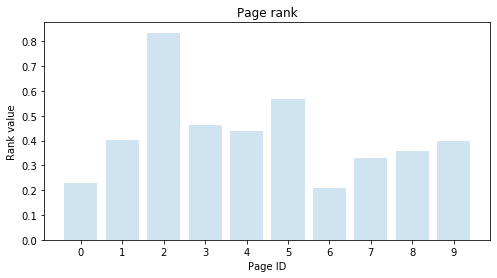

In [238]:
pr = page_rank2(lab_matrix, d=0.85, e=[0.2, 0.1, 0.2, 0.5, 0.3, 0.5, 0.1, 0.1, 0.4, 0.6])
plot_page_rank(pr)

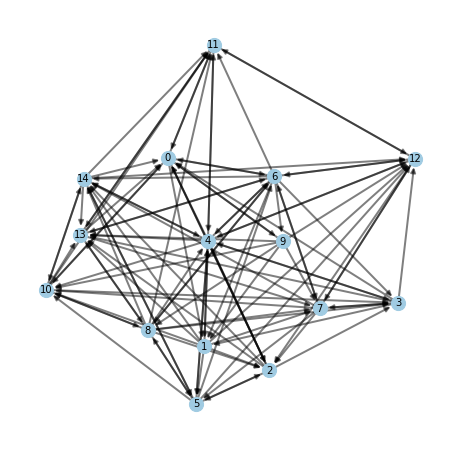

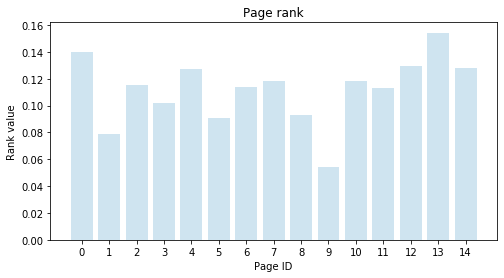

In [239]:
matrix = random_adjacency_matrix(15)
draw_graph_from_adjacency_matrix(matrix)
pr = page_rank2(matrix, d=0.85, e=[1/10]*len(matrix), iterations=1000)
plot_page_rank(pr)

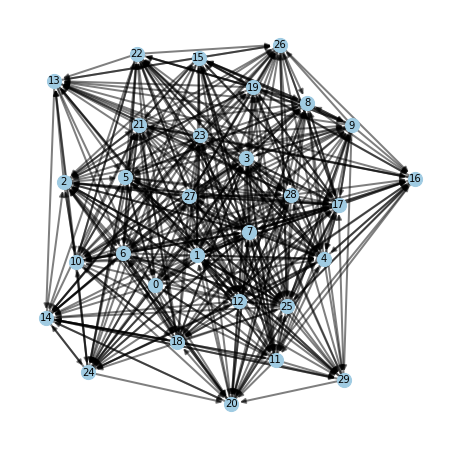

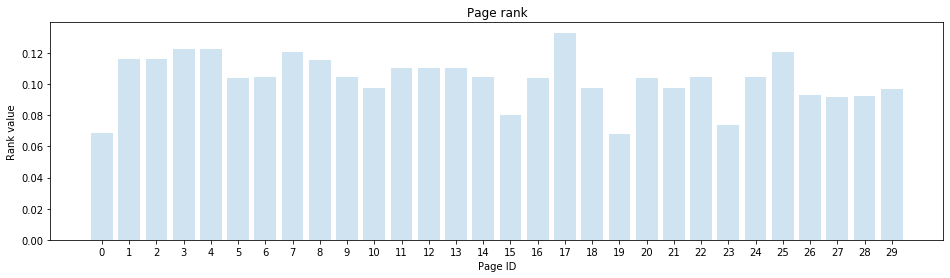

In [240]:
matrix = random_adjacency_matrix(30)
draw_graph_from_adjacency_matrix(matrix)
pr = page_rank2(matrix, d=0.85, e=[1/10]*len(matrix), iterations=1000)
plot_page_rank(pr, figwidth=16)

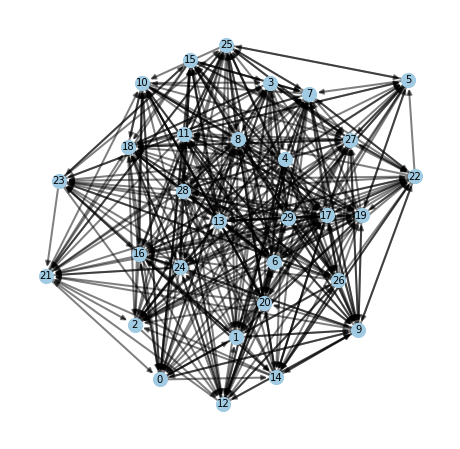

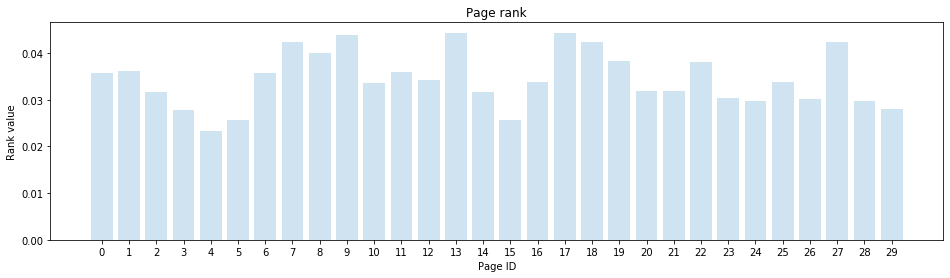

In [241]:
matrix = random_adjacency_matrix(30)
draw_graph_from_adjacency_matrix(matrix)
pr = page_rank2(matrix, d=0.85, e=[1/len(matrix)]*len(matrix), iterations=1000)
plot_page_rank(pr, figwidth=16)

Ściągnąłem przykłądowy graf z bazy SNAP.

In [242]:
def snap():
    stanford_file = open('web-Stanford.txt').readlines()[4:]
    stanford_nodes = 281904
    stanford_edges = 2312497

    stanford_node_max_value = 1000

    stanford_adjacency_matrix = np.zeros((stanford_node_max_value, stanford_node_max_value), dtype=np.int)

    for line in stanford_file:
        edge = line.split('\t')
        fromNode, toNode = int(edge[0]), int(edge[1])

        if fromNode < stanford_node_max_value and toNode < stanford_node_max_value:
            stanford_adjacency_matrix[fromNode][toNode] = 1
    return stanford_adjacency_matrix

In [243]:
matrix = snap()
pr = page_rank2(matrix, d=0.85, e=[1/10]*len(matrix))

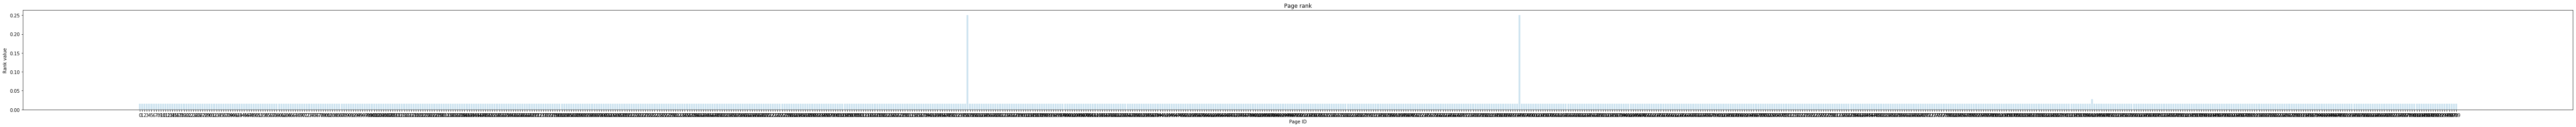

In [244]:
plot_page_rank(pr, figwidth=100)

## Wnioski:
- algorytm page rank jest szeroko stosowany w wyszukiwaniu stron internetowych (np. jest stosowany przez wyszukiwarkę google)
- wyniki które uzyskałem z obu zadniach wydają się być poprawne